# ANALISI PREDITTIVA CON METODI DI MACHINE LEARNING SU DEFAULT AZIENDALI

- Carmelo Salerno
- Marco Quarati 
- Gianni Clemente 
- Matteo Nazzario
- Irene Borgini

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
from sklearn.linear_model import LinearRegression
from sklearn import metrics, cross_validation
from sklearn import grid_search
from sklearn import naive_bayes
from sklearn import svm
from sklearn import tree

### ESTESO IL TRAINING SET PER AVERE NORD / CENTRO / SUD

In [3]:
# commentato dopo test per usare il train set esteso
#train_set = pd.read_csv('../CONTEST_TRAINING_SET_PUBBLICO.CSV')
 
train_set =pd.read_excel('CONTEST_NCS.xlsx')

In [4]:
train_set.head()

,ID,COD_CAP,N-C-S,N-C-S_FLOAT,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,...,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,1,83013.0,S,1.0,AV,1977.0,243,430,4120.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,135220.0,0.0
1,2,84131.0,S,1.0,SA,1984.0,614,492,4719.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844348.0,1054419.0,0.0
2,3,82030.0,S,1.0,BN,1952.0,12,430,11021.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332366.0,0.0
3,4,80133.0,N,0.0,NaN,1982.0,830,430,4120.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51762483.0,0.0
4,5,72021.0,S,1.0,BR,1989.0,419,482,10711.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37562.0,34857.0,0.0


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66811 entries, 0 to 66810
Data columns (total 21 columns):
ID                                   66811 non-null int64
COD_CAP                              66736 non-null float64
N-C-S                                66811 non-null object
N-C-S_FLOAT                          66811 non-null float64
COD_PROVINCIA                        63938 non-null object
DAT_COSTITUZIONE                     66580 non-null float64
COD_RAE                              66811 non-null int64
COD_SAE                              66811 non-null int64
COD_ISTAT_ATECO_07                   66386 non-null float64
FLG_DEF_6M                           66811 non-null int64
CBI201312_CREDITI                    57571 non-null float64
CBI201312_UTILE_PERDITA_ESERCIZIO    53997 non-null float64
CBI201312_PATRIMONIO_NETTO           53997 non-null float64
CBI201312_DEBITI_CONSOLIDATI         57571 non-null float64
CBI201312_DEBITI_ENTRO_ES_SUCC       57571 non-null float64
C

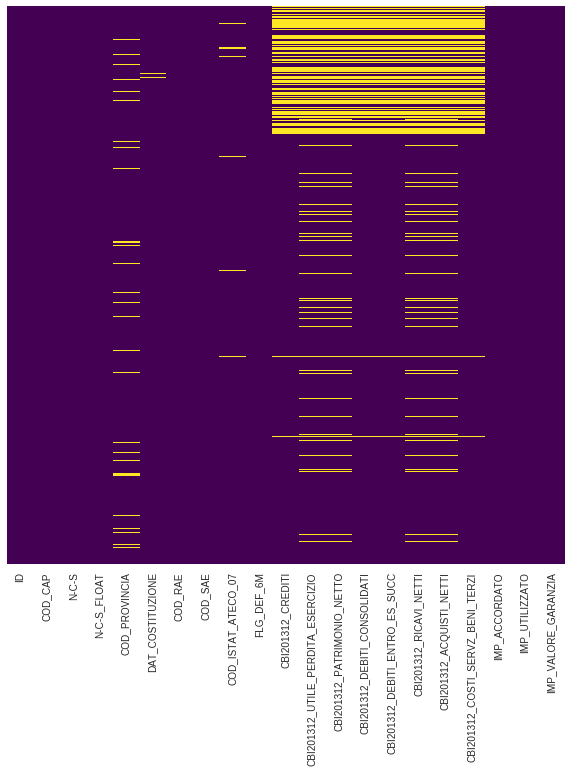

In [6]:
#Analisi dati mancanti
plt.figure(figsize=(10,10))
sns.heatmap(train_set.isnull(),yticklabels=False, cbar=False,cmap='viridis')

### Il dataset risulta incompleto, in particolare nella parte delle informazioni di bilancio. Tra le variabili quantitative risultano sempre presenti le informazioni relative alla Centrali Rischi.

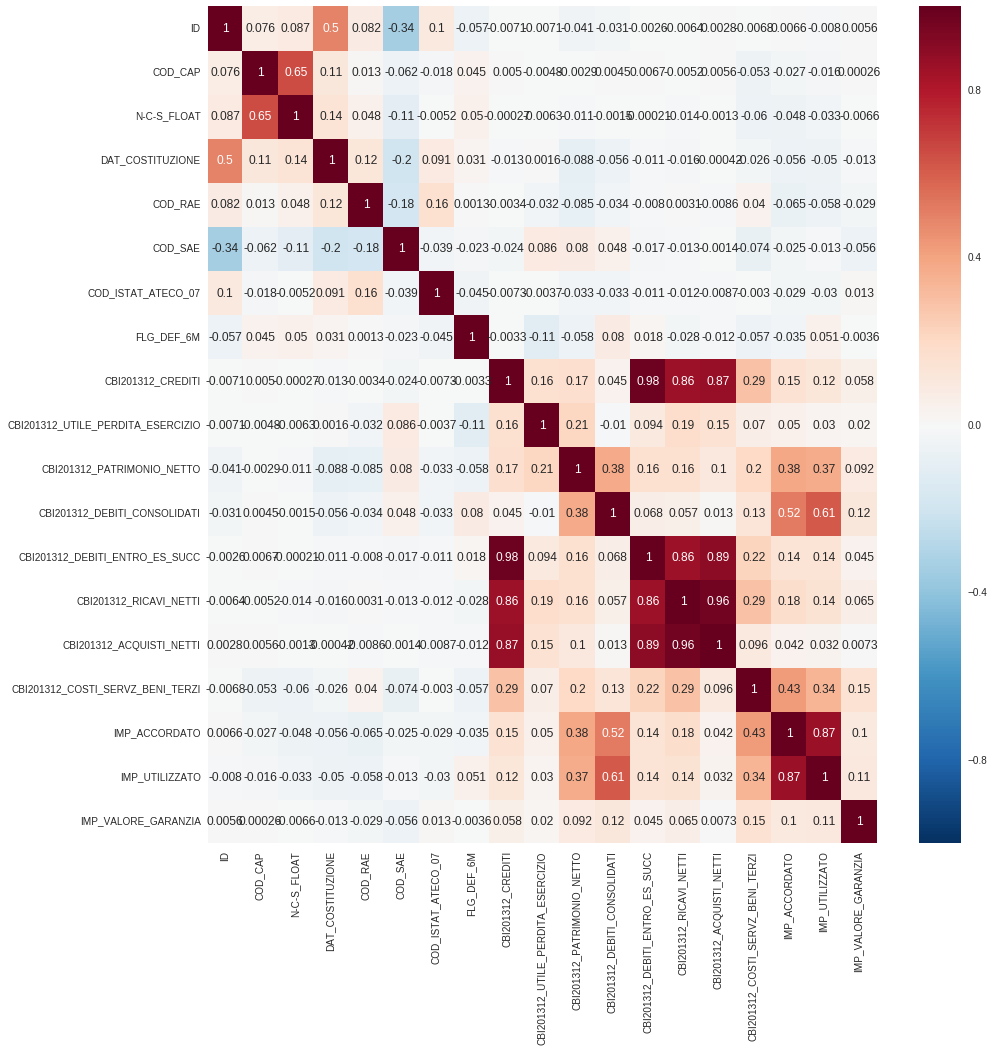

In [7]:
#Analisi della correlazione dei dati
figure = plt.figure(figsize=(15,15))
sns.heatmap(train_set.corr(),annot=True)

### Ad una prima analisi di correlazione non appaiono Patter evidenti

Blu -- Aziende in bonis
Verde -- Aziende in default


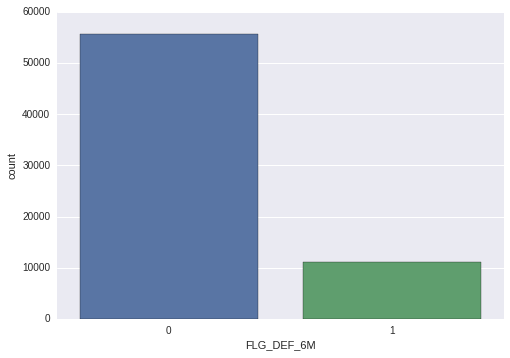

In [8]:
# Aggregato stato aziende
sns.countplot(train_set['FLG_DEF_6M'])
numeroAziendeFalliteSuTuttoDataSet = train_set['ID'][train_set['FLG_DEF_6M']==1].count()
numeroAziendePresentiSuTuttoDataSet = train_set['ID'].count()
print('Blu -- Aziende in bonis')
print('Verde -- Aziende in default')


numeroAziendeFalliteDatiCompleti = train_set['CBI201312_UTILE_PERDITA_ESERCIZIO'][(train_set['CBI201312_DEBITI_CONSOLIDATI'].notnull())&(train_set['FLG_DEF_6M']==1)].count()
numeroAziendePresentiDatiCompleti = train_set['CBI201312_UTILE_PERDITA_ESERCIZIO'][train_set['CBI201312_DEBITI_CONSOLIDATI'].notnull()].count()

In [9]:
print 'NUMERO AZIENDE FALLITE SU TUTTI DATASET', numeroAziendeFalliteSuTuttoDataSet
print 'NUMERO AZIENDE PRESENTI SU TUTTI DATASET',numeroAziendePresentiSuTuttoDataSet
percentuale_default_su_tutto_dataset = float(numeroAziendeFalliteSuTuttoDataSet)/numeroAziendePresentiSuTuttoDataSet
print 'PERCENTUALE AZIENDE IN DEFAULT SU TUTTO IL DATASET ', percentuale_default_su_tutto_dataset*100, '%'
print ''
print 'SUBSET DI RECORD AVENTI TUTTI I DATI COMPLETI'

print 'NUMERO AZIENDE FALLITE SU SUBSET CON DATI COMPLETI', numeroAziendeFalliteDatiCompleti 
print 'NUMERO AZIENDE PRESENTI SU SUBSET CON DATI COMPLETI',  numeroAziendePresentiDatiCompleti
percentuale_default_dati_complieti = float(numeroAziendeFalliteDatiCompleti)/numeroAziendePresentiDatiCompleti
print 'PERCENTUALE AZIENDE IN DEFAULT SU SUBSET CON DATI COMPLIETI ', percentuale_default_dati_complieti*100, '%'
print('')
print 'SUBSET DI RECORD AVENTI DATI INCOMPLETI'
print 'NUMERO AZIENDE FALLITE SU SUBSET CON DATI INCOMPLETI', (numeroAziendeFalliteSuTuttoDataSet-numeroAziendeFalliteDatiCompleti)
print 'NUMERO AZIENDE PRESENTI SU SUBSET CON DATI INCOMPLETI', (numeroAziendePresentiSuTuttoDataSet-numeroAziendePresentiDatiCompleti)
print 'PERCENTUALE AZIENDE IN DEFAULT SU SUBSET CON DATI IMCOMPLIETI ', float((numeroAziendeFalliteSuTuttoDataSet-numeroAziendeFalliteDatiCompleti))/(numeroAziendePresentiSuTuttoDataSet-numeroAziendePresentiDatiCompleti)*100, '%'


NUMERO AZIENDE FALLITE SU TUTTI DATASET 11062
NUMERO AZIENDE PRESENTI SU TUTTI DATASET 66811
PERCENTUALE AZIENDE IN DEFAULT SU TUTTO IL DATASET  16.5571537621 %

SUBSET DI RECORD AVENTI TUTTI I DATI COMPLETI
NUMERO AZIENDE FALLITE SU SUBSET CON DATI COMPLETI 7434
NUMERO AZIENDE PRESENTI SU SUBSET CON DATI COMPLETI 53997
PERCENTUALE AZIENDE IN DEFAULT SU SUBSET CON DATI COMPLIETI  13.767431524 %

SUBSET DI RECORD AVENTI DATI INCOMPLETI
NUMERO AZIENDE FALLITE SU SUBSET CON DATI INCOMPLETI 3628
NUMERO AZIENDE PRESENTI SU SUBSET CON DATI INCOMPLETI 12814
PERCENTUALE AZIENDE IN DEFAULT SU SUBSET CON DATI IMCOMPLIETI  28.3127828937 %


### Da una prima analisi sembrerebbe che sarebbe meglio non escludere a priori le aziende con dati non completi perche' la percentuale di default presenti nel subset di aziende non aventi dati completi e' superiore alla media del dataset

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]), <a list of 108 Text xticklabel objects>)

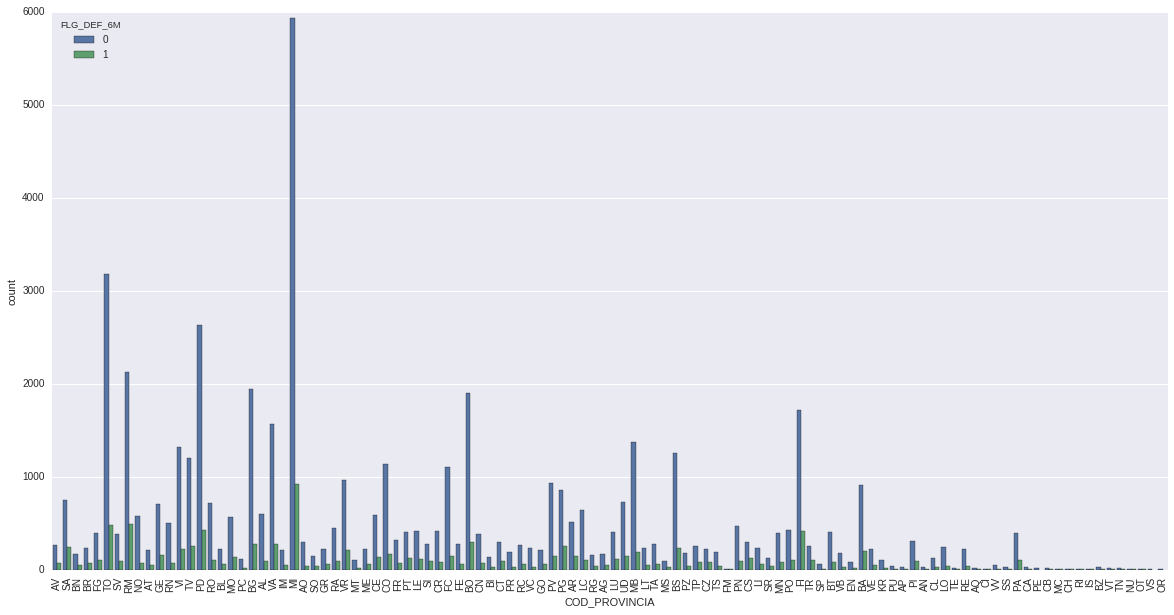

In [10]:
# ANALISI PROVINCIE
plt.figure(figsize=(20,10))
c_plot =sns.countplot(data=train_set, x='COD_PROVINCIA',hue='FLG_DEF_6M')
plt.xticks(rotation=90)

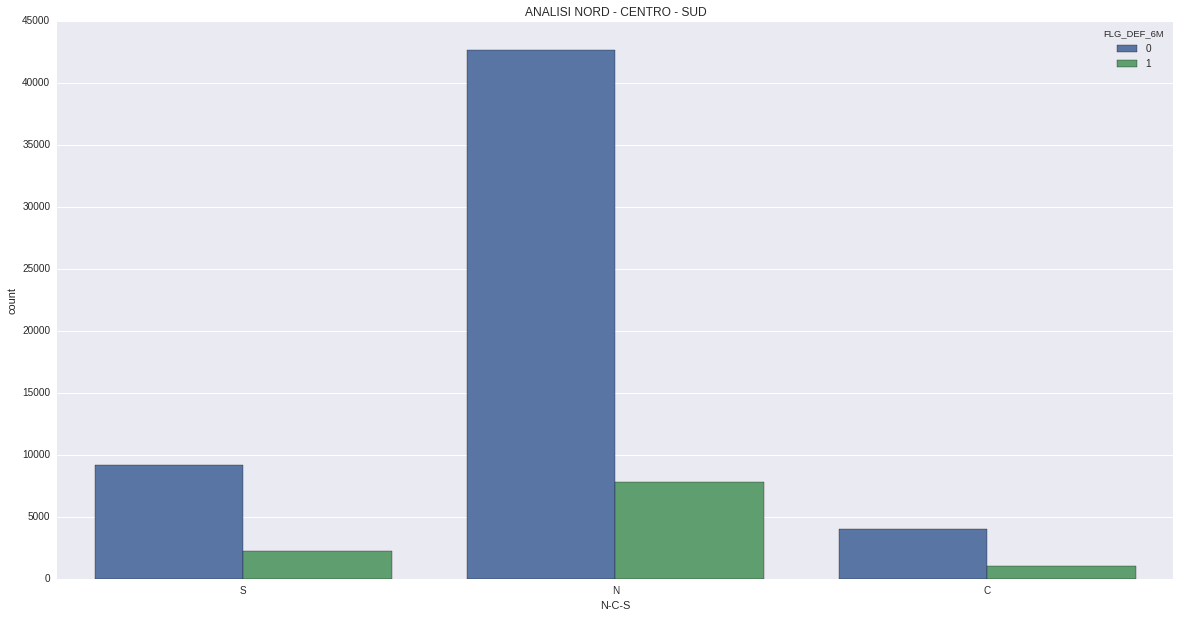

In [11]:
# ANALISI NORD - CENTRO - SUD
plt.figure(figsize=(20,10))
plt.title('ANALISI NORD - CENTRO - SUD')
c_plot =sns.countplot(data=train_set, x='N-C-S',hue='FLG_DEF_6M')


Rosso - Azienda in default
Blue - Azienda in bonis


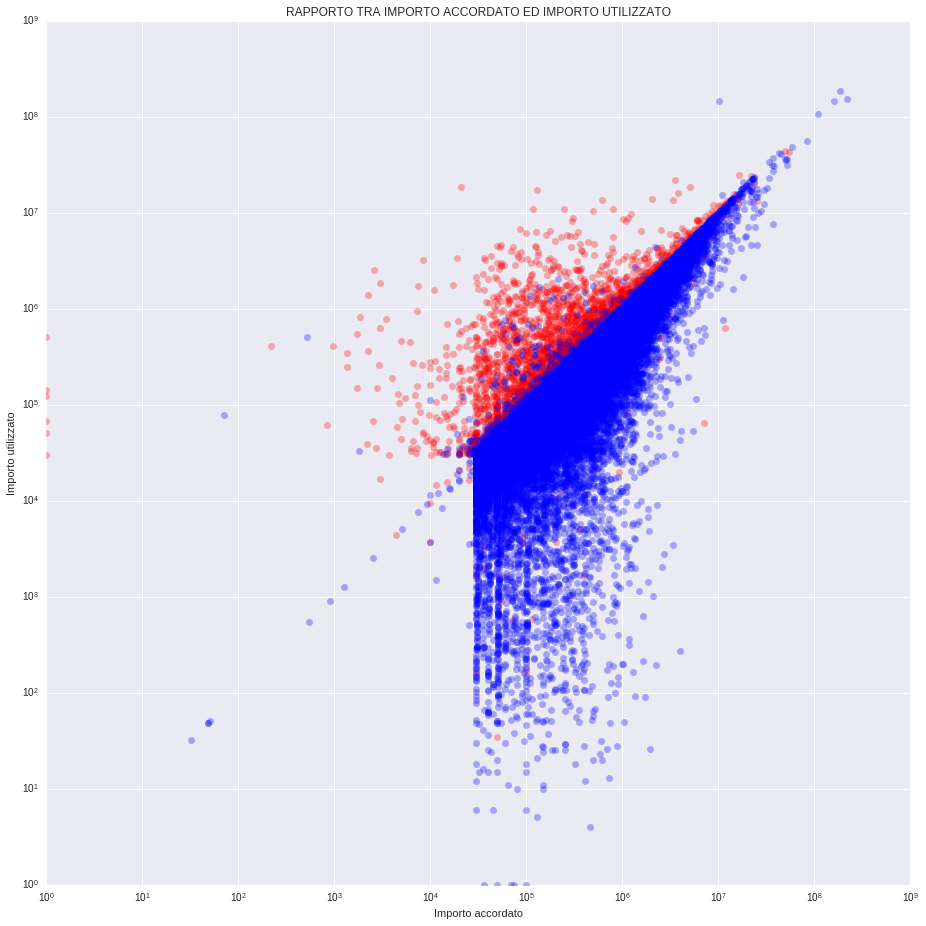

In [12]:
aziende_fallite=train_set[train_set['FLG_DEF_6M']==1]
aziende_non_fallite=train_set[train_set['FLG_DEF_6M']==0]

figure =plt.figure(figsize=(15,15))

axes = figure.add_axes([0.1,0.1,0.8,0.8])
axes.plot(aziende_fallite['IMP_ACCORDATO'],aziende_fallite['IMP_UTILIZZATO'],'ro',alpha=0.3)
axes.plot(aziende_non_fallite['IMP_ACCORDATO'],aziende_non_fallite['IMP_UTILIZZATO'],'bo',alpha=0.3)
axes.set_xlabel('Importo accordato')
axes.set_ylabel('Importo utilizzato')

axes.set_title('RAPPORTO TRA IMPORTO ACCORDATO ED IMPORTO UTILIZZATO')

plt.loglog()
print 'Rosso - Azienda in default'
print 'Blue - Azienda in bonis'
plt.show()


### Abbiamo scelto di procedere con due tipi di analisi:
 * La prima escludera' tutti i record con dati in completi
 * La secondo prendera' in considerazione tutti i record utilizzando solamente i campi che hanno tutti i dati

# ANALISI 1: Consideriamo solo record con dati completi

## PULIZIA DATI

In [13]:
#CREAZIONE TRAIN SET RIVISTO ANDANDO AD ESCLUDERE I RECORD SENZA DATI DI BILANCIO SUI QUALI NON SI RITIENE DI FARE UNA STIMA SIGNIFICATIVA
cleaned_train_set = train_set.dropna(subset=['CBI201312_CREDITI','CBI201312_UTILE_PERDITA_ESERCIZIO','CBI201312_PATRIMONIO_NETTO','CBI201312_DEBITI_CONSOLIDATI',
                                                                        'CBI201312_DEBITI_ENTRO_ES_SUCC','CBI201312_RICAVI_NETTI','CBI201312_ACQUISTI_NETTI','CBI201312_COSTI_SERVZ_BENI_TERZI'])

In [14]:
cleaned_train_set.shape

(53997, 21)

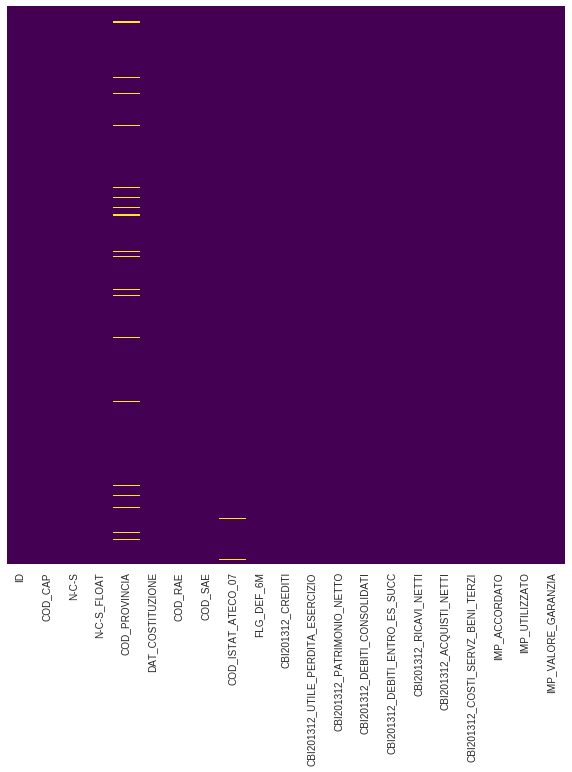

In [15]:
#EVIDENZA DI COME E' MIGLIORATO IL TRAINING SET
plt.figure(figsize=(10,10))
sns.heatmap(cleaned_train_set.isnull(),yticklabels=False, cbar=False,cmap='viridis')

### Le colonne con i dati mancanti non sono di interesse per cui non le prenderemo in considerazione

## AGGIUNTA INDICI FINANZIARI

Aggiunti:
* LEVERAGE
* ROE
* RAPPORTO TRA UTILIZZATO ED ACCORDATO
* RICAVI SU ATTIVO NETTO
* DEBITI A BREVE SU RICAVI

In [16]:
cleaned_train_set['LEVERAGE']=(cleaned_train_set['CBI201312_DEBITI_CONSOLIDATI']+cleaned_train_set['CBI201312_DEBITI_ENTRO_ES_SUCC']+1)/(cleaned_train_set['CBI201312_PATRIMONIO_NETTO']+1)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
cleaned_train_set['RAT_LOG_UT_ACC']=(np.log1p(cleaned_train_set['IMP_UTILIZZATO'])+1)/(np.log1p(cleaned_train_set['IMP_ACCORDATO'])+1)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
# CREIAMO UNA NUOVA COLONNA CHE CONTIENE IL VALORE ROE
cleaned_train_set['ROE']=(cleaned_train_set['CBI201312_UTILE_PERDITA_ESERCIZIO']+0.0001)/(cleaned_train_set['CBI201312_PATRIMONIO_NETTO']+0.0001)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
cleaned_train_set['RATIO_RIC_AN']=(cleaned_train_set['CBI201312_RICAVI_NETTI']+0.0001)/(cleaned_train_set['CBI201312_PATRIMONIO_NETTO']+cleaned_train_set['CBI201312_DEBITI_CONSOLIDATI']+cleaned_train_set['CBI201312_DEBITI_ENTRO_ES_SUCC']+0.0001)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [20]:
#PASSIVITA' CIRCOLANTE
cleaned_train_set['RATIO_DEBITI_RIC']=(cleaned_train_set['CBI201312_DEBITI_ENTRO_ES_SUCC']+0.0001)/(cleaned_train_set['CBI201312_RICAVI_NETTI']+0.0001)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [21]:
cleaned_train_set[['LEVERAGE','RAT_LOG_UT_ACC','ROE','RATIO_RIC_AN','RATIO_DEBITI_RIC']].describe()

,LEVERAGE,RAT_LOG_UT_ACC,ROE,RATIO_RIC_AN,RATIO_DEBITI_RIC
count,5.399700e+04,53997.000000,5.399700e+04,5.399700e+04,5.399700e+04
mean,inf,1.105232,7.401255e+02,8.721256e+04,1.315994e+05
std,NaN,1.488432,2.013966e+05,8.997062e+05,2.955738e+06
min,-3.237000e+03,0.063566,-4.629999e+06,-4.940495e+02,8.689607e-09
25%,1.000000e+00,0.945300,-1.127198e-02,6.398105e-01,3.222346e-01
50%,3.305010e+00,0.978485,5.479484e-02,1.153461e+00,5.319517e-01
75%,9.492063e+00,0.995248,2.513093e-01,1.827529e+00,8.877069e-01
max,inf,18.613645,4.628000e+07,6.442000e+07,3.371500e+08


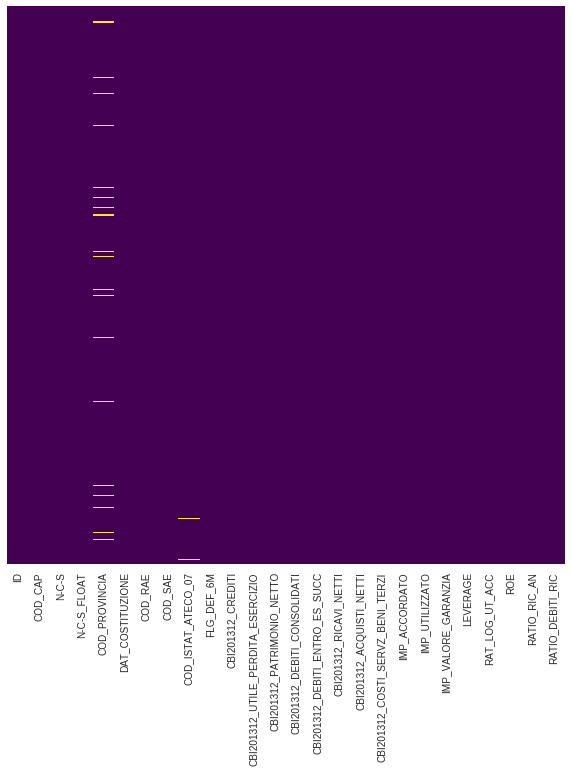

In [22]:
#Analisi dati mancanti
plt.figure(figsize=(10,10))
sns.heatmap(cleaned_train_set.isnull(),yticklabels=False, cbar=False,cmap='viridis')

# - STIMA MODELLO CON DATASET RIDOTTO

### Modello Logistic Regression con variabile RAPPORTO TRA UTILIZZATO ED ACCORDATO

In [23]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

In [24]:
X = cleaned_train_set[['RAT_LOG_UT_ACC']]

In [25]:
target= cleaned_train_set.FLG_DEF_6M

In [26]:
X_train, X_test, y_train, y_test =cross_validation.train_test_split(X,target,test_size = 0.3)

In [27]:
modelsimple = linear_model.LogisticRegression(penalty='l2')
#modelsimple.fit(X_train, y_train)
c = np.logspace(0, 5, 20)

{"C": c}
gs = grid_search.GridSearchCV(modelsimple, {"C": c},  cv=10, scoring='recall')
gs.fit(X_train, y_train)
print "best Gamma:",gs.best_params_

best Gamma: {'C': 1.0}


In [28]:
print "ACCURACY:", metrics.accuracy_score( y_test, gs.predict(X_test))
print "AUC ROC:", metrics.roc_auc_score(y_test, gs.predict_proba(X_test)[:,1])
print ""
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, gs.predict(X_test))
print ""
print "%Default Individuati:", metrics.recall_score(y_test, gs.predict(X_test))

ACCURACY: 0.873950617284
AUC ROC: 0.824797956759

Confusion Matrix
[[13943    14]
 [ 2028   215]]

%Default Individuati: 0.095853767276


### Modello Logistic Regression con variabile RAPPORTO TRA UTILIZZATO ED ACCORDATO e ROE

In [29]:
X = cleaned_train_set[['RAT_LOG_UT_ACC', 'ROE']]
target= cleaned_train_set.FLG_DEF_6M

In [30]:
X_train, X_test, y_train, y_test =cross_validation.train_test_split(X,target,test_size = 0.3)

In [31]:
modelsimple = linear_model.LogisticRegression(penalty='l2')
#modelsimple.fit(X_train, y_train)
c = np.logspace(0, 5, 20)

{"C": c}
gs_1 = grid_search.GridSearchCV(modelsimple, {"C": c},  cv=10, scoring='recall')
gs_1.fit(X_train, y_train)
print "best Gamma:",gs_1.best_params_

best Gamma: {'C': 1.0}


In [32]:
print "ACCURACY:", metrics.accuracy_score( y_test, gs_1.predict(X_test))
print "AUC ROC:", metrics.roc_auc_score(y_test, gs_1.predict_proba(X_test)[:,1])
print ""
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, gs_1.predict(X_test))
print ""
print "%Default Individuati:", metrics.recall_score(y_test, gs_1.predict(X_test))

ACCURACY: 0.87512345679
AUC ROC: 0.822170671586

Confusion Matrix
[[13966    13]
 [ 2010   211]]

%Default Individuati: 0.0950022512382


### Modello Calibrated Classifier, metodo Isotonic con variabile RAPPORTO TRA UTILIZZATO

In [35]:
from sklearn.calibration import CalibratedClassifierCV
X = cleaned_train_set[['RAT_LOG_UT_ACC']]
target= cleaned_train_set.FLG_DEF_6M
X_train, X_test, y_train, y_test =cross_validation.train_test_split(X,target,test_size = 0.3)

In [36]:
model = linear_model.Perceptron(penalty='l2', n_iter=40)
clf_isotonic = CalibratedClassifierCV(model, cv=5, method='isotonic')

clf_isotonic.fit(X_train, y_train)
y_pred_clf = clf_isotonic.predict(X_test)



In [37]:
print "ACCURACY:", metrics.accuracy_score( y_test, y_pred_clf)
print "AUC ROC:", metrics.roc_auc_score(y_test, y_pred_clf)
print ""
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, y_pred_clf)
print ""
print "%Default Individuati:", metrics.recall_score(y_test, y_pred_clf)

ACCURACY: 0.902407407407
AUC ROC: 0.693020776277

Confusion Matrix
[[13717   250]
 [ 1331   902]]

%Default Individuati: 0.4039408867


### Questo metodo, che utilizza una tecnica piu' complessa della regressione logistica, garantisce i migliori risultati

# - STIMA MODELLI PREDITTIVI CON DATASET COMPLETO

### Calcolo dell'indice su rapporto tra Utilizzato e Accordato per il data set completo


In [38]:
#Rapporto tra Utilizzi e Accordati
train_set['RAT_LOG_UT_ACC'] = (np.log1p(train_set['IMP_UTILIZZATO'])+1)/(np.log1p(train_set['IMP_ACCORDATO'])+1)

### Modello Logistic Regression con variabile RAPPORTO TRA UTILIZZATO ED ACCORDATO, Data set completo

In [39]:
X_2 = train_set[['RAT_LOG_UT_ACC']]

In [40]:
target= train_set.FLG_DEF_6M

In [41]:
X_train, X_test, y_train, y_test =cross_validation.train_test_split(X_2,target,test_size = 0.3)

In [42]:
modelsimple = linear_model.LogisticRegression(penalty='l2')
#modelsimple.fit(X_train, y_train)
c = np.logspace(-1, 5, 20)

{"C": c}
gs_2 = grid_search.GridSearchCV(modelsimple, {"C": c},  cv=10, scoring='recall')
gs_2.fit(X_train, y_train)
print "best Gamma:",gs_2.best_params_

best Gamma: {'C': 0.10000000000000001}


In [43]:
print "ACCURACY:", metrics.accuracy_score( y_test, gs_2.predict(X_test))
print "AUC ROC:", metrics.roc_auc_score(y_test, gs_2.predict_proba(X_test)[:,1])
print ""
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, gs_2.predict(X_test))
print ""
print "%Default Individuati:", metrics.recall_score(y_test, gs_2.predict(X_test))

ACCURACY: 0.867740969866
AUC ROC: 0.852381953298

Confusion Matrix
[[16635    59]
 [ 2592   758]]

%Default Individuati: 0.226268656716


### Modello Calibrated Classifier, metodo Isotonic con variabile RAPPORTO TRA UTILIZZATO, Data set completo

In [44]:
X_3= train_set[['RAT_LOG_UT_ACC']]
target= train_set.FLG_DEF_6M

In [56]:
X_train, X_test, y_train, y_test =cross_validation.train_test_split(X_3,target,test_size = 0.3)

In [57]:
model = linear_model.Perceptron(penalty='l2', n_iter=40)
clf_isotonic_1 = CalibratedClassifierCV(model, cv=5, method='isotonic')

clf_isotonic_1.fit(X_train, y_train)
y_pred_clf = clf_isotonic_1.predict(X_test)
y_pred_clf_proba = clf_isotonic_1.predict_proba(X_test)[:,1]

In [58]:
print "ACCURACY:", metrics.accuracy_score( y_test, y_pred_clf)
print "AUC ROC:", metrics.roc_auc_score(y_test, y_pred_clf_proba)
print ""
print "Confusion Matrix"
print metrics.confusion_matrix(y_test, y_pred_clf)
print ""
print "%Default Individuati:", metrics.recall_score(y_test, y_pred_clf)

ACCURACY: 0.903312712034
AUC ROC: 0.849054342689

Confusion Matrix
[[16384   314]
 [ 1624  1722]]

%Default Individuati: 0.514644351464


### Il modello "clf_isotonic_1" , stimato sul dataset completo utilizzzando il modello Calibrate Classifier, si e' rivelato essere il piu' efficace tra quelli stimati

## Effettuare le stime considerando il dataset completo comporta un sensibile aumento delle performance, come  possibile vedere dall'aumento della percentuale di default individuati

# Utilizziamo il modello piu' efficace per effettuare le predizioni sul test set

In [51]:
X_test_set = pd.read_csv('../CONTEST_TEST_SET_PUBBLICO.csv')

### Calcolo dell'indice sui dati di Accordato e Utilizzato per il test set

In [52]:
X_test_set['RAT_LOG_UT_ACC'] = (np.log1p(X_test_set ['IMP_UTILIZZATO'])+1)/(np.log1p(X_test_set['IMP_ACCORDATO'])+1)

In [53]:
Target_test_set = pd.read_csv('../CONTEST_TEST_RESULTS_AN_PRIVATO.csv')

In [54]:
Target = Target_test_set.FLG_DEF_6M

In [62]:
X = X_test_set[['RAT_LOG_UT_ACC']]
X.head()

,RAT_LOG_UT_ACC
0,1.000000
1,1.000502
2,0.999344
3,0.988934
4,0.069747


In [63]:
metrics.confusion_matrix(Target, clf_isotonic_1.predict(X) )

array([[6099,  137],
       [ 654,  657]])

In [65]:
print "ACCURACY:", metrics.accuracy_score(Target, clf_isotonic_1.predict(X))
print "AUC ROC:", metrics.roc_auc_score(Target, clf_isotonic_1.predict_proba(X)[:,1])
print ""
print "Confusion Matrix"
print metrics.confusion_matrix(Target, clf_isotonic_1.predict(X))
print ""
print "%Default Individuati:", metrics.recall_score(Target, clf_isotonic_1.predict(X))

 ACCURACY: 0.895190141778
AUC ROC: 0.852507266926

Confusion Matrix
[[6099  137]
 [ 654  657]]

%Default Individuati: 0.50114416476


# EVOLUZIONE FILLING DATI MANCANTI

### Sulla base delle evidenze emerse una delle evoluzioni percorribili  e' forzare il popolamento dei dati mancanti.

Si evidenziano due possibilita': 
* Popolare i dati mancanti con la media dei valori presenti
* Utilizzare un algoritmo di machine learning

#### In questa fase si e' scelto di iniziare a utilizzare l'approccio ML

Si intende ripopolare i dati di bilancio

### Preparazione Training Set

In [49]:
#ESCLUDIAMO LE COLONNE CHE HANNO DEI DATI NULLI DAL SET DI TRAINING
fillna_ds = train_set.drop(['COD_CAP', 'DAT_COSTITUZIONE','COD_PROVINCIA'],axis=1)

In [50]:
#Eliminiamo 425 righe che hanno codice ateco null
fillna_ds=fillna_ds[fillna_ds['COD_ISTAT_ATECO_07'].notnull()]

In [51]:
#Elimino le righe che non hanno dati da passare all'algoritmo di ML
fillna_ds = fillna_ds.dropna()

# Creazione dell'algoritmo di regressione lineare 

In [52]:
from sklearn.linear_model import LinearRegression

In [66]:
X=fillna_ds[['IMP_ACCORDATO', 'IMP_UTILIZZATO','IMP_VALORE_GARANZIA','CBI201312_UTILE_PERDITA_ESERCIZIO']]
y = fillna_ds['CBI201312_UTILE_PERDITA_ESERCIZIO']
X=X[['IMP_ACCORDATO', 'IMP_UTILIZZATO','IMP_VALORE_GARANZIA']]

Preparazione dei test e dei training set

In [68]:
X_train, X_test, y_train, y_test =cross_validation.train_test_split(X,y,test_size = 0.3)

### Algoritmo di regressione lineare per popolare l'utile e perdita di esercizio

In [69]:
lm_CBI201312_UTILE_PERDITA_ESERCIZIO = LinearRegression()

In [70]:
lm_CBI201312_UTILE_PERDITA_ESERCIZIO.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
predictions = lm_CBI201312_UTILE_PERDITA_ESERCIZIO.predict(X_test)

In [72]:
print 'in-sample-mean squared error :', metrics.mean_squared_error(lm_CBI201312_UTILE_PERDITA_ESERCIZIO.predict(X_train),y_train) 
print 'out-of-sample-mean squared error :', metrics.mean_squared_error(lm_CBI201312_UTILE_PERDITA_ESERCIZIO.predict(X_test),y_test) 

in-sample-mean squared error : 85588.8722726
out-of-sample-mean squared error : 52181.028016


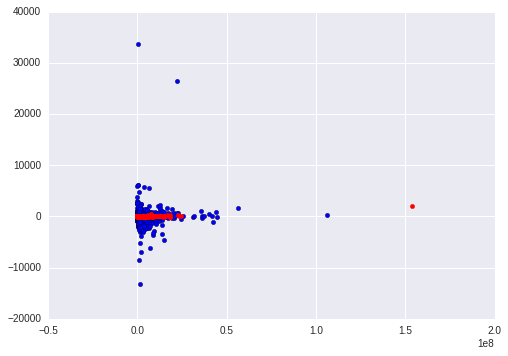

In [73]:
plt.scatter(X_train['IMP_UTILIZZATO'],y_train)
plt.scatter(X_test['IMP_UTILIZZATO'],predictions,color='r')

### Popolamento colonna CBI201312_UTILE_PERDITA_ESERCIZIO con dati generati dall'algoritmo 

In [74]:
filled_train_set = train_set

In [75]:
def impute_CBI201312_UTILE_PERDITA_ESERCIZIO(cols):
    #CBI201312_UTILE_PERDITA_ESERCIZIO
    utile_perdite_esercizio = cols['CBI201312_UTILE_PERDITA_ESERCIZIO']
    if pd.isnull(utile_perdite_esercizio):
        cols_for_prediction=cols.drop('CBI201312_UTILE_PERDITA_ESERCIZIO',axis=0)
        return lm_CBI201312_UTILE_PERDITA_ESERCIZIO.predict(cols_for_prediction)
        
    else:
        return utile_perdite_esercizio

In [ ]:
filled_train_set['CBI201312_UTILE_PERDITA_ESERCIZIO']=filled_train_set[['CBI201312_UTILE_PERDITA_ESERCIZIO','IMP_ACCORDATO', 'IMP_UTILIZZATO','IMP_VALORE_GARANZIA']].apply(impute_CBI201312_UTILE_PERDITA_ESERCIZIO,axis=1)

/home/bigdive/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/home/bigdive/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/home/bigdive/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/home/bigdive/anaconda2/lib/pyt

In [ ]:
#Analisi dati mancanti
plt.figure(figsize=(10,10))
sns.heatmap(filled_train_set.isnull(),yticklabels=False, cbar=False,cmap='viridis')